In [1]:
import numpy
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
test_wav = "frank_snack-crosswise_cigarette.wav"

signal, rate = librosa.load(test_wav, sr=11025)

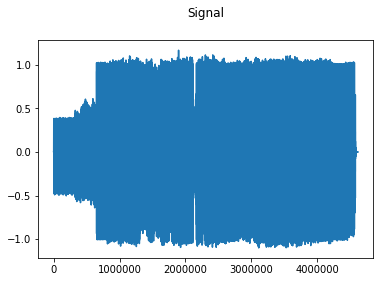

In [3]:
fig, axes = plt.subplots()
axes.set_title('Signal', y=1.08)
axes.plot(list(signal))

In [4]:
tempo, beats = librosa.beat.beat_track(y=signal, sr=rate)

beat_times = librosa.frames_to_time(beats, sr=rate)

onset_env = librosa.onset.onset_strength(y=signal, sr=rate, aggregate=numpy.median)

hop_length = 512
times = librosa.times_like(onset_env, sr=rate, hop_length=hop_length)
print(times[beats])

G:\Programme\anaconda 2019.10\lib\site-packages\librosa\filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


[3.25079365e-01 7.89478458e-01 1.25387755e+00 1.71827664e+00
 2.18267574e+00 2.64707483e+00 3.11147392e+00 3.66875283e+00
 4.13315193e+00 4.59755102e+00 5.06195011e+00 5.52634921e+00
 5.99074830e+00 6.45514739e+00 6.91954649e+00 7.38394558e+00
 7.84834467e+00 8.31274376e+00 8.77714286e+00 9.24154195e+00
 9.70594104e+00 1.01239002e+01 1.05882993e+01 1.10526984e+01
 1.15170975e+01 1.19814966e+01 1.24458957e+01 1.29102948e+01
 1.33746939e+01 1.38390930e+01 1.43034921e+01 1.47678912e+01
 1.52322902e+01 1.56966893e+01 1.61610884e+01 1.66254875e+01
 1.70898866e+01 1.75078458e+01 1.79722449e+01 1.84366440e+01
 1.89010431e+01 1.93654422e+01 1.98298413e+01 2.02942404e+01
 2.07586395e+01 2.12230385e+01 2.16874376e+01 2.21518367e+01
 2.26162358e+01 2.30806349e+01 2.35450340e+01 2.40094331e+01
 2.44738322e+01 2.49382313e+01 2.53561905e+01 2.58205896e+01
 2.62849887e+01 2.67493878e+01 2.72137868e+01 2.76781859e+01
 2.81425850e+01 2.86069841e+01 2.90713832e+01 2.95357823e+01
 3.00001814e+01 3.046458

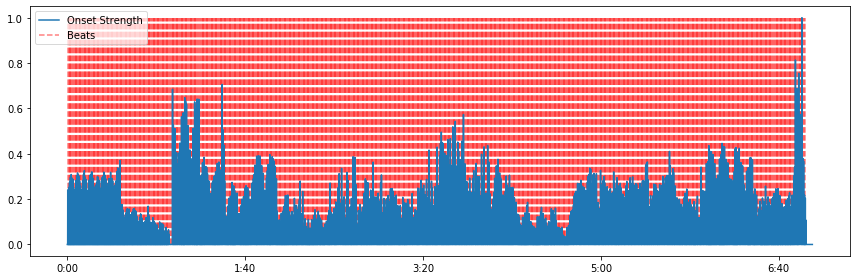

In [9]:
plt.figure(figsize=(12,4))
plt.plot(times, librosa.util.normalize(onset_env), label="Onset Strength")
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)

plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()
plt.show()

In [10]:
onset_samples = list(librosa.frames_to_samples(beats))
onset_samples = numpy.concatenate(onset_samples, len(signal))
starts = onset_samples[0:-1]
stops = onset_samples[1:]

In [11]:
print(len(starts), len(stops))

896 896


In [14]:
for i in range(0, len(starts)-16, 16):
    clip=signal[starts[i]:stops[i+16]]  
    librosa.output.write_wav("temp\\"+str(i/16)+"_clip.wav", clip, rate)